In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import sampyl as smp
from sampyl import np

# Autograd throws some warnings that are useful, but this is
# a demonstration, so I'll squelch them.
import warnings


In [45]:
true_mu = 100
true_sd = 15
N_samples = 10000

In [46]:
x_true = np.random.normal(true_mu , true_sd , N_samples )

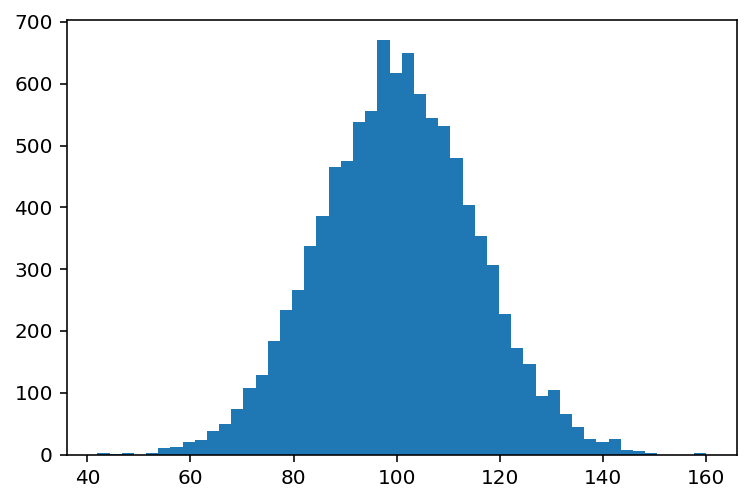

In [47]:
plt.hist(x_true , bins = 50)
plt.show()

In [48]:
def normal_inf(mu , sig):
    ## Define model
    model = smp.Model()
    ### likelihood function
    model.add(smp.normal(x_true, mu = mu, sig=sig)) 
    ### priors for sig and mu
    model.add(smp.normal(sig))
    model.add(smp.uniform(mu, lower=0, upper=200))
    return model()

In [54]:
start = {'mu' : 10. , 'sig' : 1.}

In [58]:
sampler = smp.NUTS(normal_inf , start)
chain = sampler(1000, burn=200, thin=4)

/Users/Rhys/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/Rhys/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Progress: [##############################] 1000 of 1000 samples


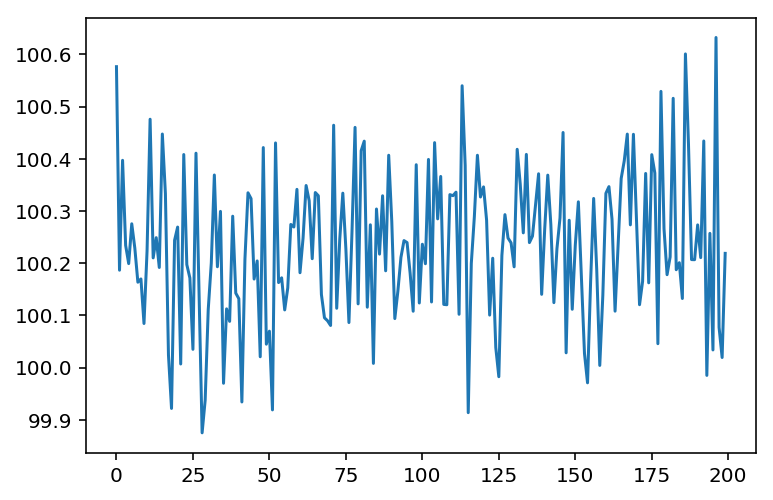

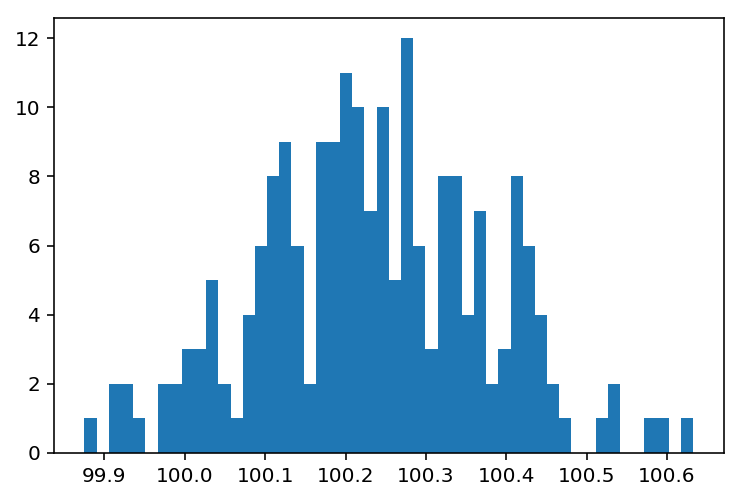

In [59]:
plt.figure()
plt.plot(chain.mu)
plt.figure()
plt.hist(chain.mu, bins=50)
plt.show()

In [ ]:
plt.hist(chain.x, bins=30)
plt.vlines(mu, 0, 250, linestyles='--')

In [6]:
sigma = 1
N = 101
x = np.linspace(0 , 100 , N )
x_ar = np.array((x , x**2 , x**3))
true_a = np.array([10, 20 ,30])
true_curve = np.dot(true_a, x_ar) + np.random.normal(0, 5 , N)*sigma

In [8]:
def loglike(B , sig):
    model = smp.Model()
    # Estimate from our data and coefficients
    inf_curve = np.dot( B , x_ar)
    # Add log-likelihood
    model.add(smp.normal(true_curve, mu = inf_curve, sig=sig)) 
    # Add prior for estimate error
    model.add(smp.normal(sig))
    # Uniform priors on coefficients
    model.add(smp.uniform(B, lower=-100, upper=100))
    return model()

In [9]:
#start = smp.find_MAP(loglike,{'B': np.ones(3), 'sig': 1.})
start = {'B' : np.ones(3) , 'sig' : 1.}
sampler = smp.Metropolis(loglike, start)
chain = sampler(150, burn=100, thin=4)

Progress: [##############################] 150 of 150 samples


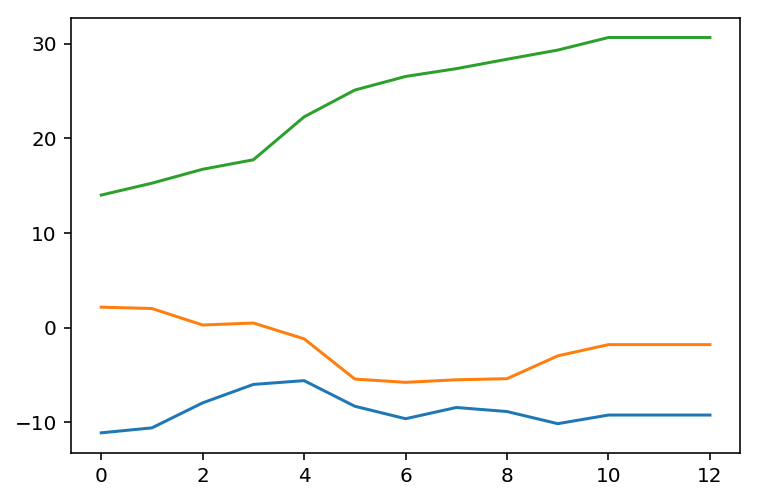

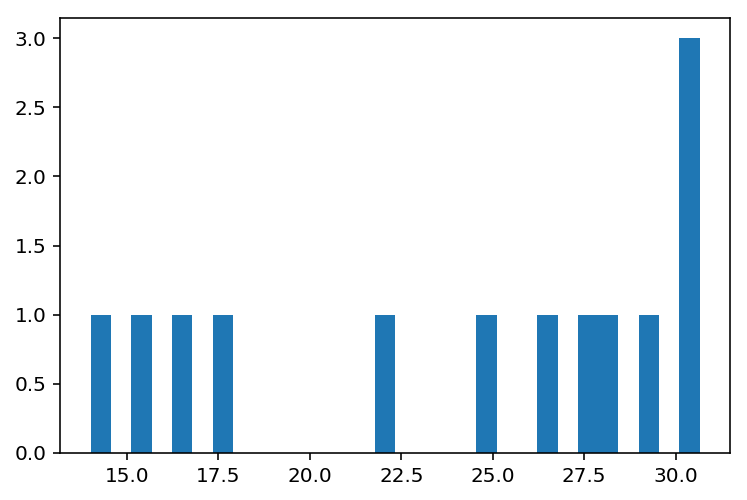

In [10]:
plt.figure()
plt.plot(chain.B)
plt.figure()
plt.hist(chain.B[:,2], bins=30)
plt.show()

In [11]:
start = smp.find_MAP(loglike,{'B': np.ones(3), 'sig': 1.})
Nuts_test = smp.NUTS(loglike , start)
Nuts_chain = Nuts_test(200 , burn = 50)

/Users/Rhys/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


Progress: [##############################] 200 of 200 samples


In [12]:
Nuts_chain.B.shape

(150, 3)

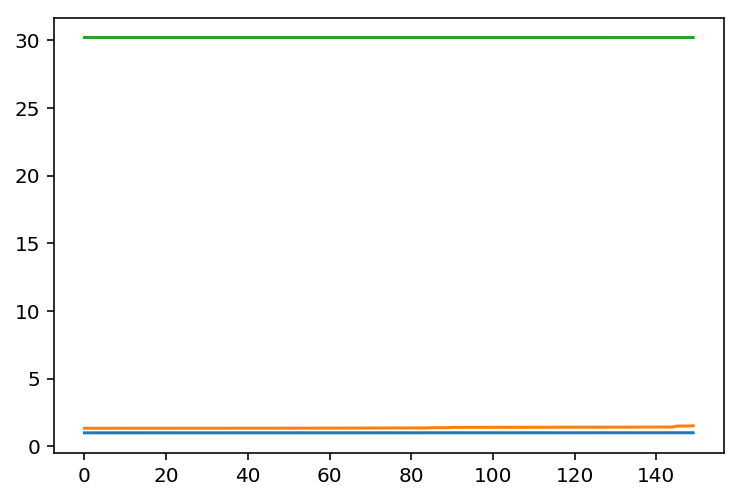

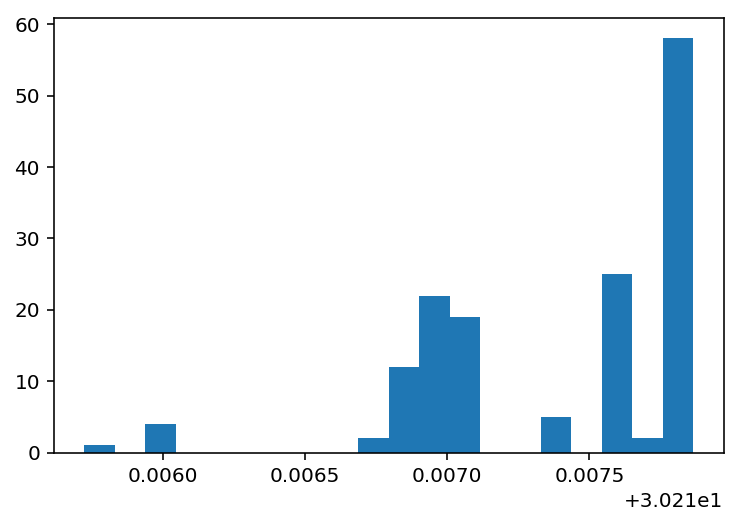

In [13]:
plt.figure()
plt.plot(Nuts_chain.B)
plt.figure()
plt.hist(Nuts_chain.B[:,2], bins=20)
plt.show()